In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
file_path1 = '/content/drive/MyDrive/Final year project/datafinal/train_set_after_pca.csv'
file_path2 = '/content/drive/MyDrive/Final year project/datafinal/test_set_after_pca.csv'

# Load training and testing data from Excel files
train_df = pd.read_csv(file_path1)
test_df = pd.read_csv(file_path2)

# Extract features and labels
X_train = train_df.iloc[:, :-1].values  # Features (all columns except the last one)
y_train = train_df.iloc[:, -1].values   # Labels (the last column)
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values


In [3]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=290b3ba5fd10b9889eb62c96dc8326680a6da3fe3318ab06eead3423ff7b4dc3
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [4]:
from minisom import MiniSom

# Define SOM parameters
som_width = 10  # Width of the SOM grid
som_height = 10  # Height of the SOM grid
input_dim = X_train.shape[1]  # Number of input features
learning_rate = 0.5  # Learning rate
sigma = 1.0  # Spread of the neighborhood function
epochs = 100  # Number of training epochs

# Initialize the SOM
som = MiniSom(som_width, som_height, input_dim, sigma=sigma, learning_rate=learning_rate)

# Train the SOM
som.train_batch(X_train, epochs)


In [5]:
# Initialize a list to store predicted labels
predicted_labels = []

# For each sample in the test data
for sample in X_test:
    # Find the best-matching unit (BMU) in the SOM
    bmu = som.winner(sample)

    if bmu == (0, 0):
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)
#LOW ACCURACY

Accuracy: 0.5385989283588013
Precision: 0.5385073441842001
Recall: 1.0
F1 Score: 0.7000387046832667
Mean Squared Error: 0.46
Mean Absolute Error: 0.46


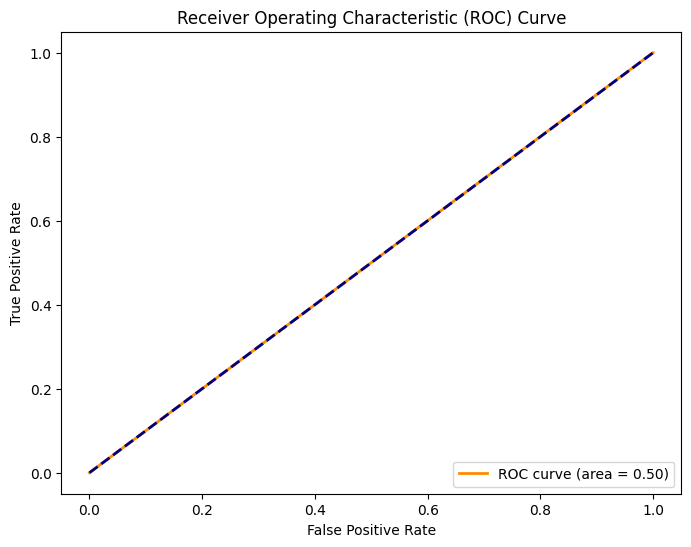

NameError: ignored

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
import matplotlib.pyplot as plt
import torch

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#recall is nearly equal to 1 i.e. model is overfitting the data
mse = mean_squared_error(y_test, predicted_labels)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_labels)
print(f'Mean Absolute Error: {mae:.2f}')
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a list to store predicted labels and decision values
predicted_labels = []
decision_values = []

# For each sample in the test data
for sample in X_test:
    # Find the best-matching unit (BMU) in the SOM
    bmu = som.winner(sample)

    # Make a decision based on BMU
    if bmu == (0, 0):
        predicted_labels.append(0)
        decision_values.append(0)  # Set a decision value for class 0
    else:
        predicted_labels.append(1)
        decision_values.append(1)  # Set a decision value for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_values)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#som model 2
# Define SOM parameters
som_width1 = 15  # Width of the SOM grid
som_height1 = 15  # Height of the SOM grid
input_dim = X_train.shape[1]  # Number of input features
learning_rate1 = 0.03  # Learning rate
sigma1 = 1.0  # Spread of the neighborhood function
epochs1 = 150  # Number of training epochs

# Initialize the SOM
som2 = MiniSom(som_width1, som_height1, input_dim, sigma=sigma1, learning_rate=learning_rate1)

# Train the SOM
som2.train_batch(X_train, epochs1)

In [ ]:
predicted_labels1 = []

# For each sample in the test data
for sample in X_test:
    # Find the best-matching unit (BMU) in the SOM
    bmu = som2.winner(sample)


    if bmu == (0, 0):
        predicted_labels1.append(0)
    else:
        predicted_labels1.append(1)

Accuracy: 0.5384004762849772
Precision: 0.5384004762849772
Recall: 1.0
F1 Score: 0.6999484004127967
Mean Squared Error: 0.46
Mean Absolute Error: 0.46


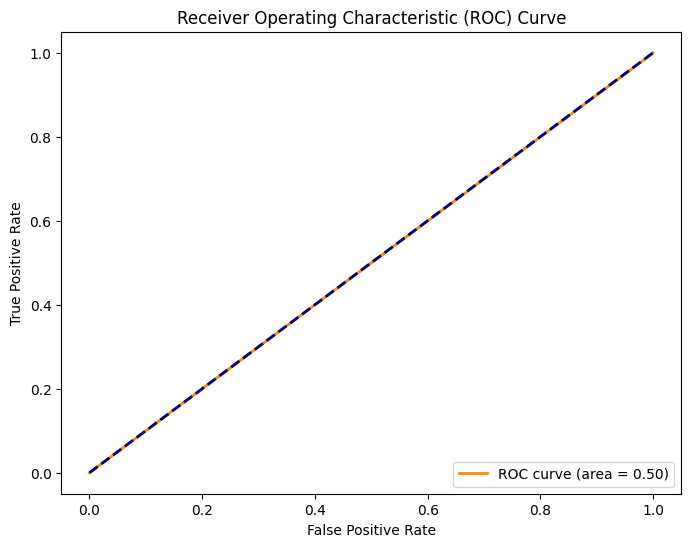

In [ ]:
accuracy = accuracy_score(y_test, predicted_labels1)
precision = precision_score(y_test, predicted_labels1)
recall = recall_score(y_test, predicted_labels1)
f1 = f1_score(y_test, predicted_labels1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#model is overfitting the data as recall is equal to 1
#recall is nearly equal to 1 i.e. model is overfitting the data
mse = mean_squared_error(y_test, predicted_labels)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_labels)
print(f'Mean Absolute Error: {mae:.2f}')
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a list to store predicted labels and decision values
predicted_labels = []
decision_values = []

# For each sample in the test data
for sample in X_test:
    # Find the best-matching unit (BMU) in the SOM
    bmu = som.winner(sample)

    # Make a decision based on BMU
    if bmu == (0, 0):
        predicted_labels.append(0)
        decision_values.append(0)  # Set a decision value for class 0
    else:
        predicted_labels.append(1)
        decision_values.append(1)  # Set a decision value for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_values)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2.3227412538734593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.46
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Specificity: 1.00
False Positive Rate: 0.00


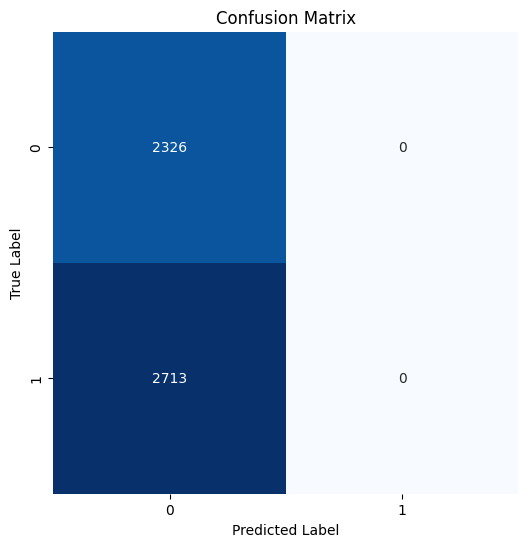

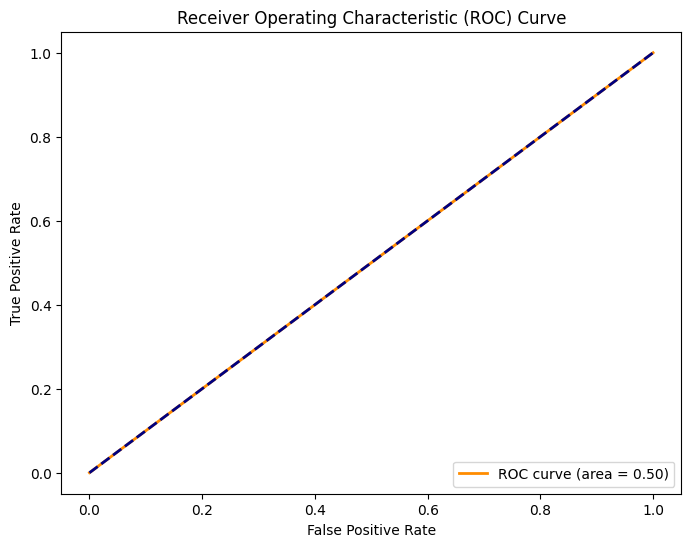

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom

# Load training and testing data from CSV files
train_data = pd.read_csv(file_path1)
test_data = pd.read_csv(file_path2)

# Extract features and labels
X_train = train_data.iloc[:, :22].values
y_train = train_data.iloc[:, 22].values
X_test = test_data.iloc[:, :22].values
y_test = test_data.iloc[:, 22].values

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SOM
num_clusters = 10  # Adjust the number of clusters as needed
som = MiniSom(num_clusters, 1, X_train.shape[1], sigma=1.0, learning_rate=0.5)
som.train_batch(X_train, 1000, verbose=True)

# Convert SOM BMUs to decision values
decision_values_train = [1 if som.winner(x) == (0,) else 0 for x in X_train]
decision_values_test = [1 if som.winner(x) == (0,) else 0 for x in X_test]

# Evaluate the model
accuracy = accuracy_score(y_test, decision_values_test)
precision = precision_score(y_test, decision_values_test)
recall = recall_score(y_test, decision_values_test)
f1 = f1_score(y_test, decision_values_test)

# Specificity and False Positive Rate
conf_matrix = confusion_matrix(y_test, decision_values_test)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Specificity: {:.2f}".format(specificity))
print("False Positive Rate: {:.2f}".format(false_positive_rate))

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_values_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
